1. HISTOGRAM CITRA

masukan file/citra


Saving IMG_20221213_200525.jpg to IMG_20221213_200525 (3).jpg


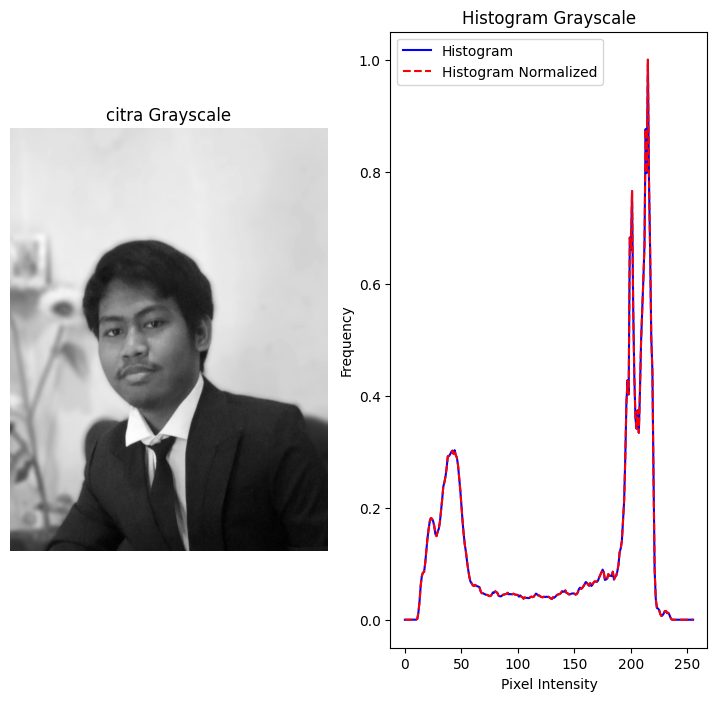

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
from google.colab import files

# 1. masukan file/citra
print("masukan file/citra")
uploaded = files.upload()

# load gambar/citra yang di unggah
if uploaded:
    file_name = list(uploaded.keys())[0]

    # 2. membaca gambar/citra dalam bentuk grayscale
    image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("gambar/citra tidak ada")
    else:
        # 3. Hitung histogram
        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

        # 4. Normalisasi histogram
        histogram_normalized = cv2.normalize(histogram, histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

        # 5. ukuran hasil citra
        plt.figure(figsize=(9, 8))

        # Tampilkan gambar grayscale
        plt.subplot(1, 2, 1)
        plt.title("citra Grayscale")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        # Tampilkan histogram
        plt.subplot(1, 2, 2)
        plt.title("Histogram Grayscale")
        plt.plot(histogram, color='blue', label='Histogram')
        plt.plot(histogram_normalized, color='red', linestyle='--', label='Histogram Normalized')
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()
else:
    print("Tidak ada file yang diunggah.")


Langkah- langkah dalam kode diatas :
1. membaca Citra: gunakan fungsi library OpenCV untuk membaca gambar dalam mode grayscale.
2. Hitung Histogram: gunakan fungsi atau sintaks cv2.calcHist() untuk menghitung histogram.
3. Normalisasi Histogram: untuk normalisasi histogram citra gunakan fungsi atau sintaks cv2.normalize().
4. Visualisasi/Hasil: gunakan fungsi lobrary matplotlib untuk menampilkan gambar/citra grayscale beserta histogramnya.

.

2. Operasi Konvolusi dengan kernel 3x3

masukan file/citra


Saving WIN_20241122_08_35_57_Pro.jpg to WIN_20241122_08_35_57_Pro.jpg


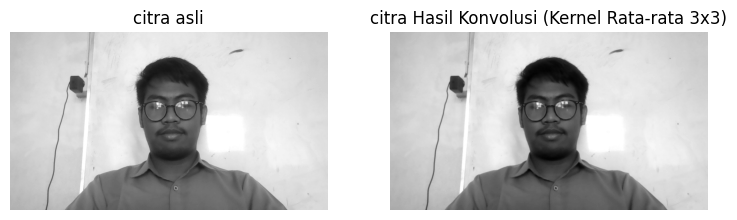

Efek yang terjadi setelah konvolusi:
- Gambar menjadi lebih halus karena kernel rata-rata 3x3 berfungsi sebagai filter smoothing.
- Detail dan tepi gambar cenderung sedikit berkurang.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# 1. masukan file/citra
print("masukan file/citra")
uploaded = files.upload()

# Mload citra/gambar yang di unggah
if uploaded:
    file_name = list(uploaded.keys())[0]

    # 2. membaca gambar/citra dalam bentuk grayscale
    image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("gambar/ citra tidak ada")
    else:
        # 3. membuat kernel rata-rata 3x3
        kernel = np.ones((3, 3), np.float32) / 9

        # 4. proses operasi konvolusi
        convolved_image = cv2.filter2D(image, -1, kernel)

        # 5. ukuran hasil citra
        plt.figure(figsize=(9, 8))

        # Tampilkan citra asli
        plt.subplot(1, 2, 1)
        plt.title("citra asli")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        # Tampilkan citra hasil konvolusi
        plt.subplot(1, 2, 2)
        plt.title("citra Hasil Konvolusi (Kernel Rata-rata 3x3)")
        plt.imshow(convolved_image, cmap='gray')
        plt.axis('off')
        plt.show()

        # Penjelasan efek konvolusi
        print("Efek yang terjadi setelah konvolusi:")
        print("- Gambar menjadi lebih halus karena kernel rata-rata 3x3 berfungsi sebagai filter smoothing.")
        print("- Detail dan tepi gambar cenderung sedikit berkurang.")
else:
    print("Tidak ada file yang diunggah.")


langkah-langkah dalam kode diatas :
1. membaca Gambar/citra: gunakan fungsi library OpenCV untuk membaca gambar.
2. buat Kernel Rata-rata 3x3: fungsi Kernel ini berisi nilai rata-rata yang akan digunakan untuk operasi konvolusi.
3. melakukan proses operasi Konvolusi: gunakan fungsi atau sintaks cv2.filter2D() untuk menerapkan konvolusi pada gambar/citra.
4. bandingkan hasil: munculkan gambar/citra asli dan gambar/citra hasil konvolusi untuk melihat efek apa yang telah dihasilkan dari operasi tersebut.

.

3. Transformasi Fourir

masukan file/citra


Saving IMG_20210828_150916_042.webp to IMG_20210828_150916_042.webp


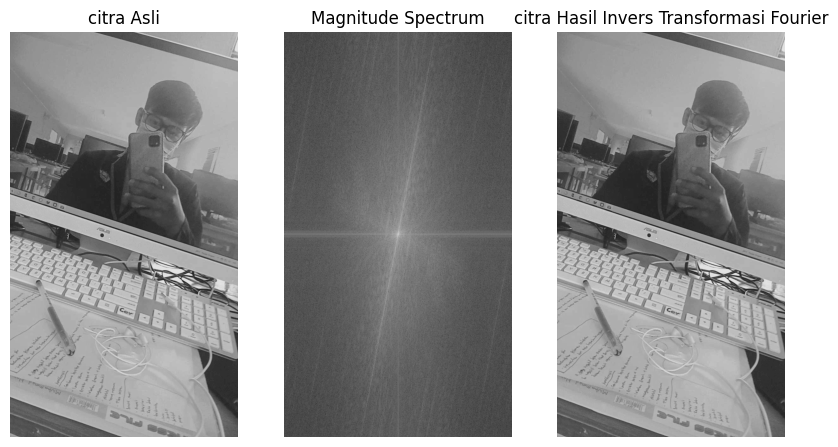

Informasi dari Magnitude Spectrum:
- Bagian tengah spektrum mengandung frekuensi rendah (area terang).
- Bagian pinggir spektrum mengandung frekuensi tinggi (area gelap).
- Frekuensi tinggi menggambarkan detail gambar, seperti tepi dan tekstur.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# 1. masukan file/citra
print("masukan file/citra")
uploaded = files.upload()

# load gambar/citra yang di unggah
if uploaded:
    file_name = list(uploaded.keys())[0]

    # 2. membaca gambar/citra dalam bentuk grayscale
    image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("gambar/citra tidak ada")
    else:
        # 3. melakukan proses Transformasi Fourier
        f_transform = np.fft.fft2(image)
        f_shift = np.fft.fftshift(f_transform)  # Shift ke tengah frekuensi
        magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  # Tambahkan 1 untuk menghindari log(0)

        # 4. melaakukan proses invers Transformasi Fourier
        f_ishift = np.fft.ifftshift(f_shift)  # Balikkan shift
        image_reconstructed = np.fft.ifft2(f_ishift)
        image_reconstructed = np.abs(image_reconstructed)  # Ambil nilai absolut untuk domain spasial

        # 5. Visualisasi hasil
        plt.figure(figsize=(10, 8))

        # citra asli
        plt.subplot(1, 3, 1)
        plt.title("citra Asli")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        # Magnitude Spectrum
        plt.subplot(1, 3, 2)
        plt.title("Magnitude Spectrum")
        plt.imshow(magnitude_spectrum, cmap='gray')
        plt.axis('off')

        # citra hasil invers Fourier
        plt.subplot(1, 3, 3)
        plt.title("citra Hasil Invers Transformasi Fourier")
        plt.imshow(image_reconstructed, cmap='gray')
        plt.axis('off')
        plt.show()

        # Penjelasan informasi dari Magnitude Spectrum
        print("Informasi dari Magnitude Spectrum:")
        print("- Bagian tengah spektrum mengandung frekuensi rendah (area terang).")
        print("- Bagian pinggir spektrum mengandung frekuensi tinggi (area gelap).")
        print("- Frekuensi tinggi menggambarkan detail gambar, seperti tepi dan tekstur.")
else:
    print("Tidak ada file yang diunggah.")


Langkah-langkah dalam kode diatas :
1. menbaca Gambar/citra: gunakan fungsi library OpenCV untuk membaca gambar.
2. proses transformasi Fourier: gunakan fungsi sintaks np.fft.fft2() untuk menghitung Transformasi Fourier.
3. Magnitude Spectrum: Menghitung magnitude spectrum menggunakan fungsi sintaks np.log() untuk visualisasi hasil.
4. Invers Transformasi Fourier: gunakan fungsi sintaks np.fft.ifft2() untuk mengembalikan gambar ke domain spasial.
5. Visualisasi: tampilkan gambar/citra asli, magnitude spectrum, dan hasil invers.

.

4. Operasi Aritmatika Citra

masukan file/citra


Saving WhatsApp Image 2024-11-04 at 12.19.24.jpeg to WhatsApp Image 2024-11-04 at 12.19.24 (1).jpeg


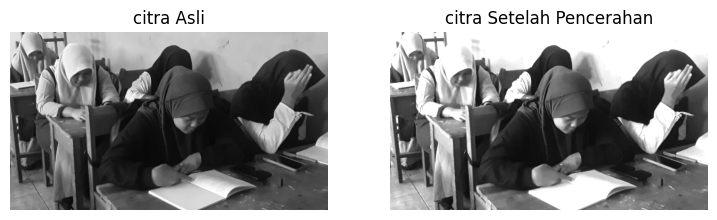

Efek Pencerahan:
- Gambar menjadi lebih terang setelah penambahan konstanta pada setiap piksel.
- Nilai piksel yang melebihi 255 akan dipotong (clipping) karena rentang nilai piksel pada citra 8-bit adalah 0 hingga 255.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# 1. masukan file/citra
print("masukan file/citra")
uploaded = files.upload()

# load gambar/citra yang di unggah
if uploaded:
    file_name = list(uploaded.keys())[0]

    # 2. membaca gambar/citra dalam bentuk grayscale
    image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("gambar/citra tidak ada")
    else:
        # 3. Penerapan penambahan kecerahan (tambah konstanta pada piksel)
        brightness_constant = 75  # Misalnya, menambah 75 pada tiap piksel
        brightened_image = cv2.add(image, brightness_constant)

        # 4. ukuran hasil citra
        plt.figure(figsize=(9, 8))

        # citra asli
        plt.subplot(1, 2, 1)
        plt.title("citra Asli")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        # citra setelah pencerahan
        plt.subplot(1, 2, 2)
        plt.title("citra Setelah Pencerahan")
        plt.imshow(brightened_image, cmap='gray')
        plt.axis('off')
        plt.show()

        # Penjelasan efek pencerahan
        print("Efek Pencerahan:")
        print("- Gambar menjadi lebih terang setelah penambahan konstanta pada setiap piksel.")
        print("- Nilai piksel yang melebihi 255 akan dipotong (clipping) karena rentang nilai piksel pada citra 8-bit adalah 0 hingga 255.")
else:
    print("Tidak ada file yang diunggah.")


Langkah-langkah dalam kode diatas :
1. membaca Gambar/citra: gunakan fungsi library OpenCV untuk membaca gambar.
2. Penerapan Pencerahan: tambahkan konstanta ke setiap nilai piksel dengan catatan tidak melewati nilai maksimum dengan menggunakan operasi clipping.
3. Clipping: Memastikan nilai piksel tidak melebihi batas maksimum (255 untuk citra 8-bit).
4. Visualisasi: tampilkan gambar/citra asli dan gambar/citra setelah pencerahan.